# Library And Read Data:

In [1]:
# Phần 1. GBM
# Data: Loan Data (Upload Github)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Doc du lieu tu file
df = pd.read_csv("loan_data.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Information:

In [5]:
df.drop(columns=['Loan_ID'], inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
numeric_cols = [f for f in df.columns if df[f].dtype!="O"]

In [7]:
df[numeric_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
object_cols = [f for f in df.columns if df[f].dtype =="O"]

In [9]:
df[object_cols].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
object_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Clean Data:

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


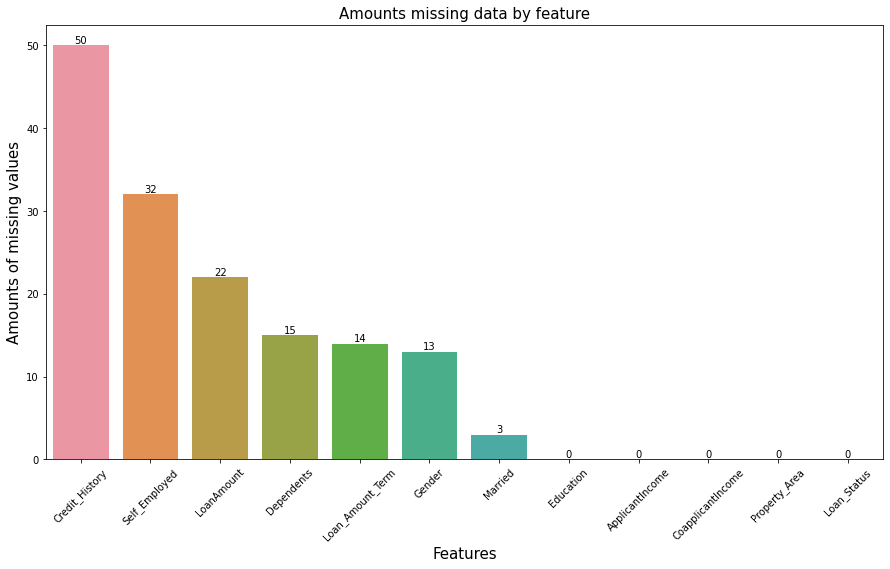

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f,ax =plt.subplots(figsize=(15, 8))
plt.xticks(rotation='45')
ax1 = sns.barplot(x=missing_data.index, y=missing_data['Total'])
ax1 = ax1.bar_label(ax1.containers[0])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Amounts of missing values', fontsize=15)
plt.title('Amounts missing data by feature', fontsize=15)

missing_data

## Quantitative Data:

### Missing Data:

,Total,Percent
Credit_History,50,8.143322
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


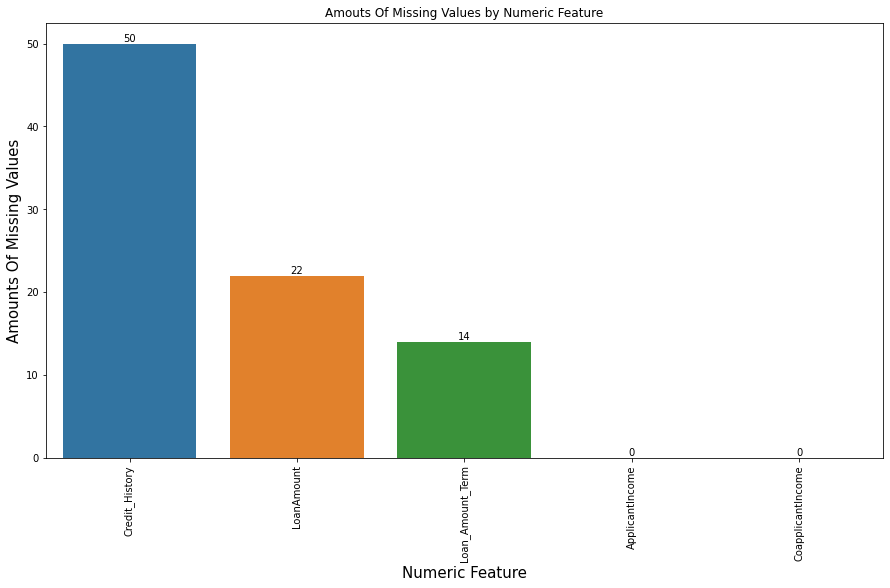

In [12]:
total = df[numeric_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[numeric_cols].isnull().sum()/df[numeric_cols].isnull().count().sort_values(ascending=False))
missing_data = (pd.concat([total,percent],axis=1,keys=['Total','Percent']))

f,ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=90)
ax1 = sns.barplot(x=missing_data.index,y=missing_data['Total'])
ax1.bar_label(ax1.containers[0])
plt.xlabel('Numeric Feature',fontsize=15)
plt.ylabel('Amounts Of Missing Values',fontsize=15)
plt.title('Amouts Of Missing Values by Numeric Feature')

missing_data

#### Credit_History:

In [13]:
df['Credit_History'].fillna(value= df['Credit_History'].min(),inplace=True)

#### Loan_Amount_Term:

In [14]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(),inplace=True)

#### LoanAmount:

In [16]:
df['LoanAmount'].fillna(value=df['LoanAmount'].median(),inplace=True)

### Outlier:

<AxesSubplot:>

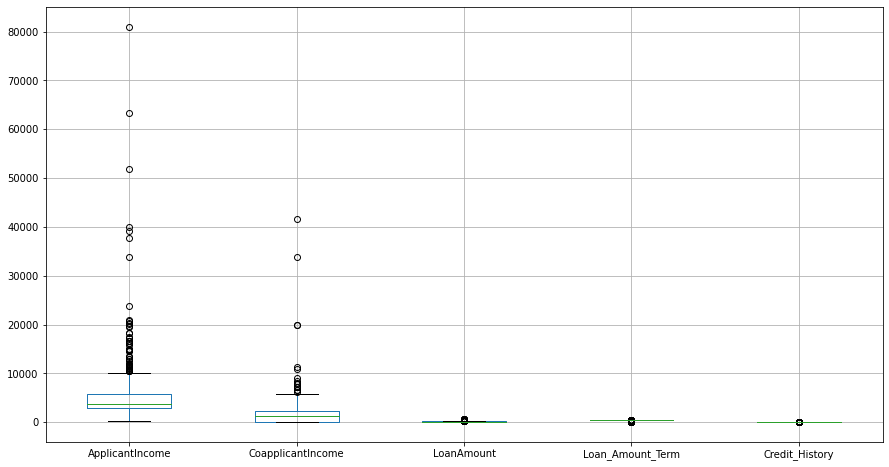

In [17]:
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()

#### ApplicantIncome:

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


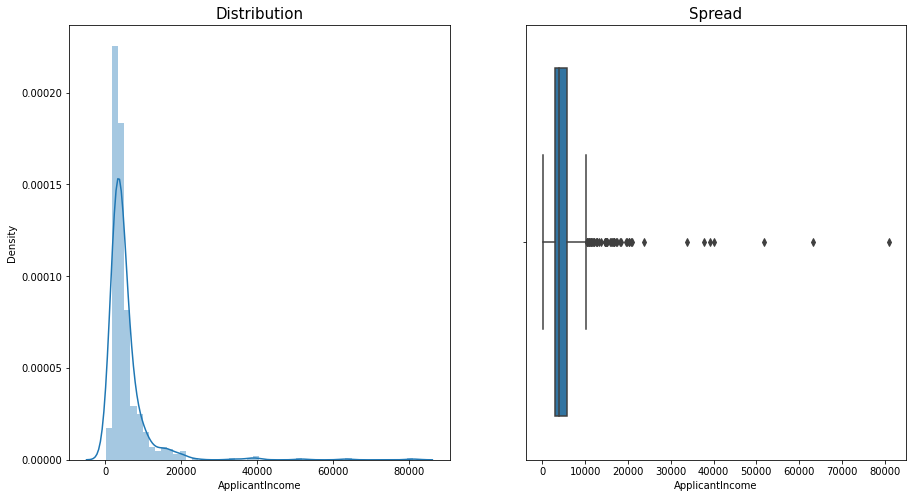

In [18]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title("Distribution",fontsize=15)
sns.distplot(df.ApplicantIncome)

plt.subplot(1,2,2)
plt.title('Spread',fontsize=15)
sns.boxplot(df.ApplicantIncome)

plt.show()

In [19]:
q1_ApplicantIncome = df['ApplicantIncome'].quantile(0.25)
q3_ApplicantIncome = df['ApplicantIncome'].quantile(0.75)
IQR_ApplicantIncome = q3_ApplicantIncome - q1_ApplicantIncome

In [20]:
df = df[~((df["ApplicantIncome"] < (q1_ApplicantIncome - 1.5 * IQR_ApplicantIncome)) | (df["ApplicantIncome"] > (q3_ApplicantIncome + 1.5 *IQR_ApplicantIncome)))]

In [21]:
df.shape

(564, 12)

In [22]:
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

#### CoapplicantIncome:

In [23]:
q1_CoapplicantIncome = df['CoapplicantIncome'].quantile(0.25)
q3_CoapplicantIncome = df['CoapplicantIncome'].quantile(0.75)
IQR_CoapplicantIncome = q3_CoapplicantIncome - q1_CoapplicantIncome

In [24]:
df = df[~((df["CoapplicantIncome"] < (q1_CoapplicantIncome - 1.5 * IQR_CoapplicantIncome)) | (df["CoapplicantIncome"] > (q3_CoapplicantIncome + 1.5 *IQR_CoapplicantIncome)))]

In [25]:
df.shape

(548, 12)

#### LoanAmount

In [26]:
q1_LoanAmount = df['LoanAmount'].quantile(0.25)
q3_LoanAmount = df['LoanAmount'].quantile(0.75)
IQR_LoanAmount = q3_LoanAmount - q1_LoanAmount

In [27]:
df = df[~((df["LoanAmount"] < (q1_LoanAmount - 1.5 * IQR_LoanAmount)) | (df["LoanAmount"] > (q3_LoanAmount + 1.5 *IQR_LoanAmount)))]

In [28]:
df.shape

(520, 12)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


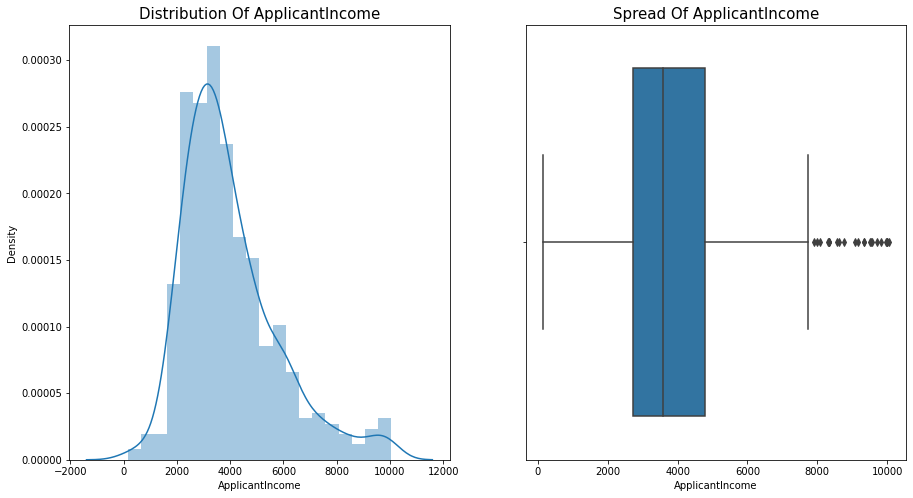

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


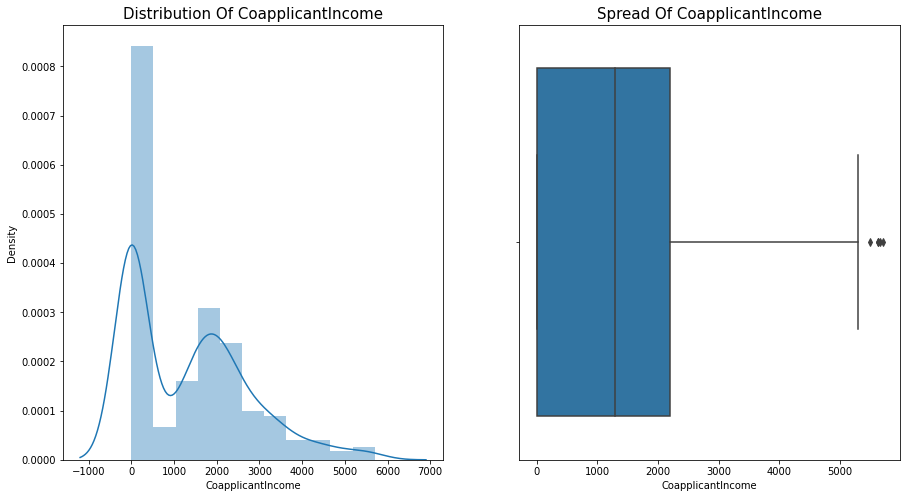

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


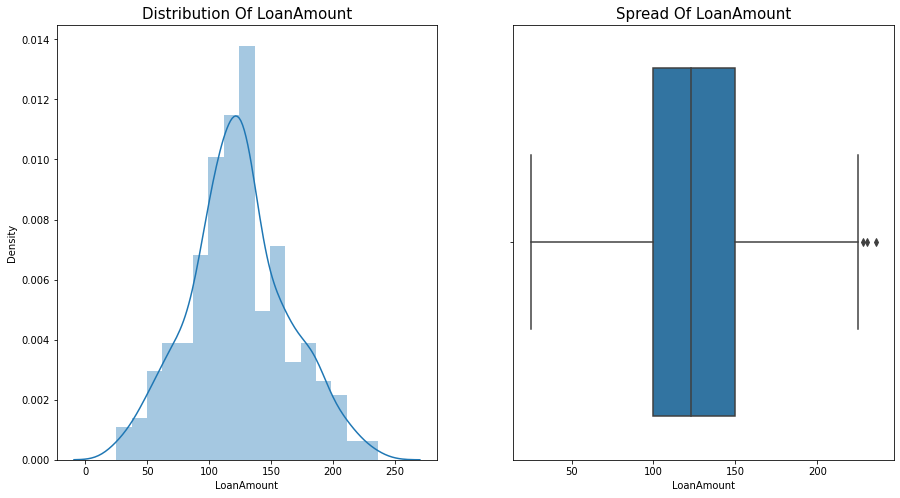

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


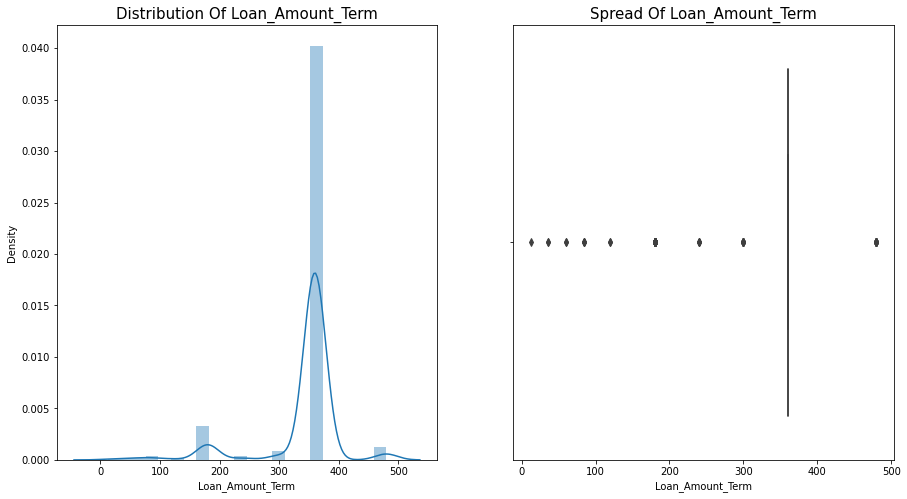

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


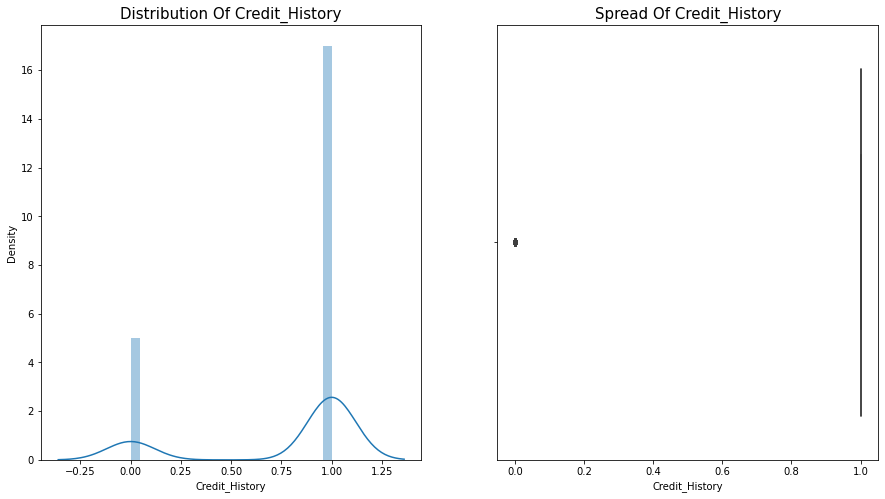

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(15,8))

    plt.subplot(1,2,1)
    plt.title(f"Distribution Of {col}",fontsize=15)
    sns.distplot(df[col])

    plt.subplot(1,2,2)
    plt.title(f'Spread Of {col}',fontsize=15)
    sns.boxplot(df[col])

    plt.show()

## Qualitative Data:

,Total,Percent
Self_Employed,28,5.384615
Dependents,14,2.692308
Gender,9,1.730769
Married,3,0.576923
Education,0,0.000000
Property_Area,0,0.000000
Loan_Status,0,0.000000


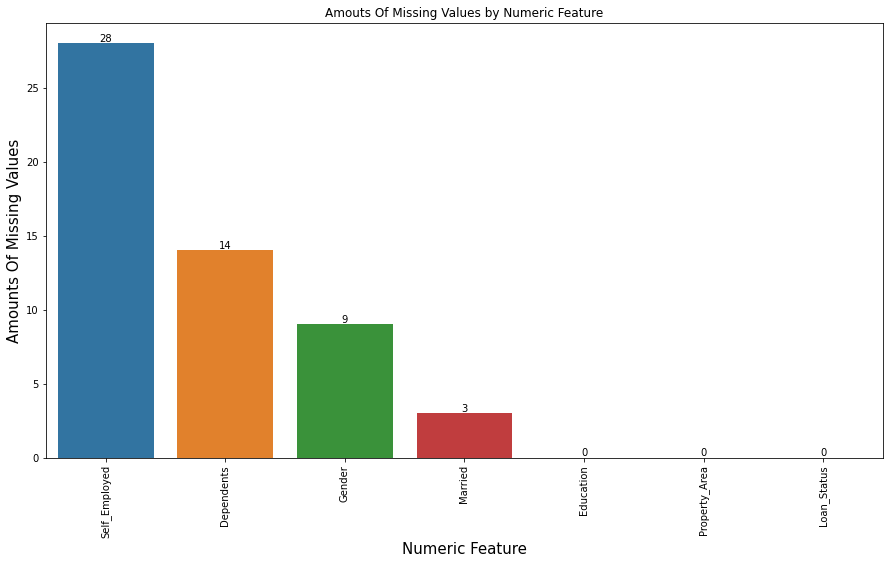

In [30]:
total = df[object_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[object_cols].isnull().sum()/df[object_cols].isnull().count().sort_values(ascending=False))
missing_data = (pd.concat([total,percent],axis=1,keys=['Total','Percent']))

f,ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation=90)
ax1 = sns.barplot(x=missing_data.index,y=missing_data['Total'])
ax1.bar_label(ax1.containers[0])
plt.xlabel('Numeric Feature',fontsize=15)
plt.ylabel('Amounts Of Missing Values',fontsize=15)
plt.title('Amouts Of Missing Values by Numeric Feature')

missing_data

In [36]:
df[object_cols].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,520,520,520,520,520,520,520
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,421,333,315,389,461,199,362


In [32]:
df['Married'].fillna(value='No',inplace=True)

In [33]:
df['Dependents'].fillna(value='0',inplace=True)

In [34]:
df['Self_Employed'].fillna(value='No',inplace=True)

In [35]:
df['Gender'].fillna(method='ffill',inplace=True)

# EDA:

In [37]:
df['Dependents'].value_counts()

0     315
2      86
1      81
3+     38
Name: Dependents, dtype: int64

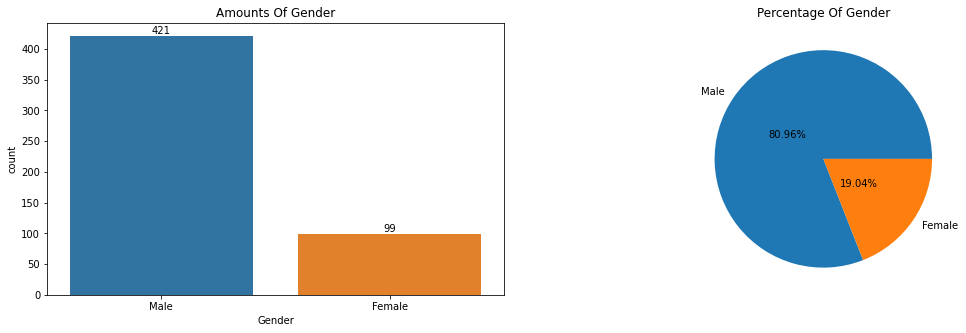

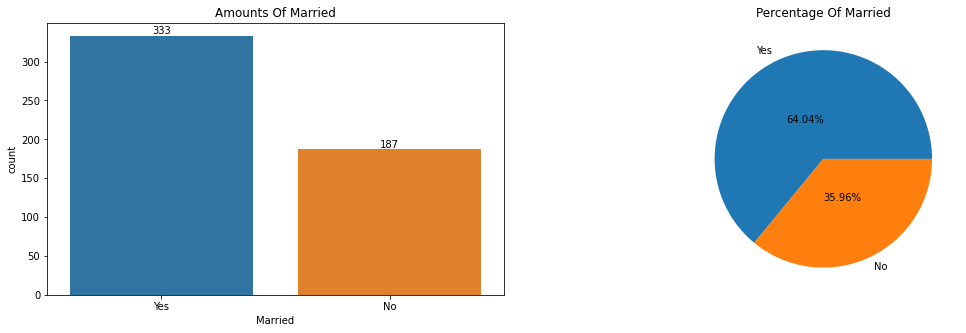

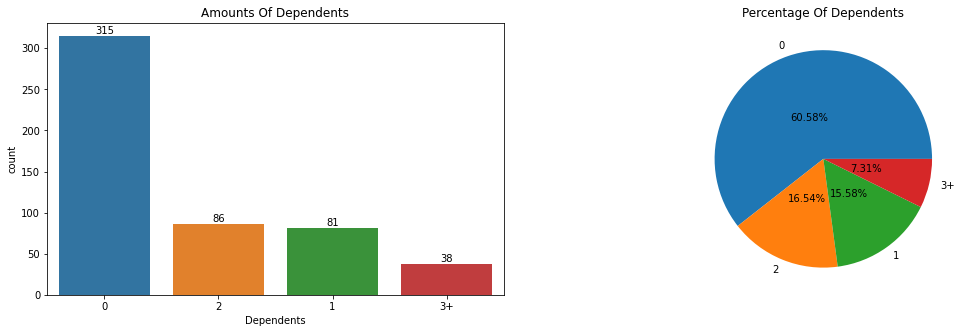

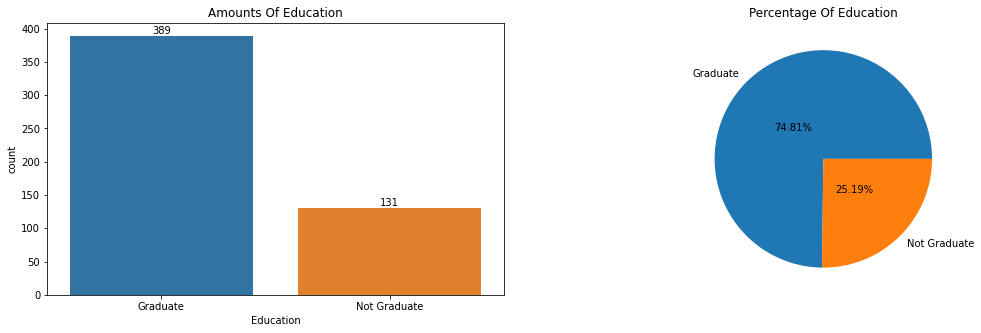

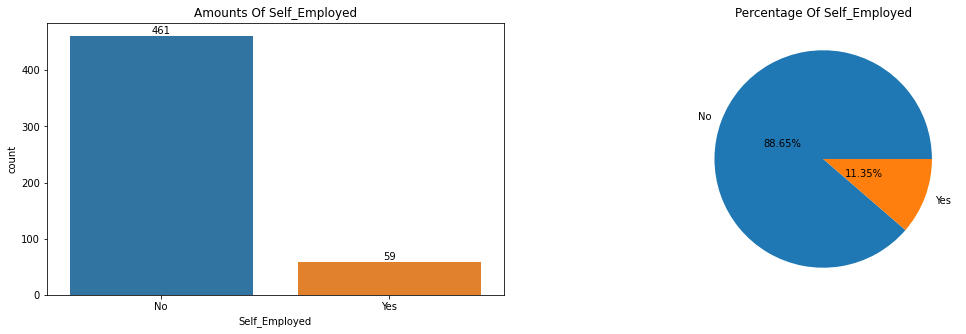

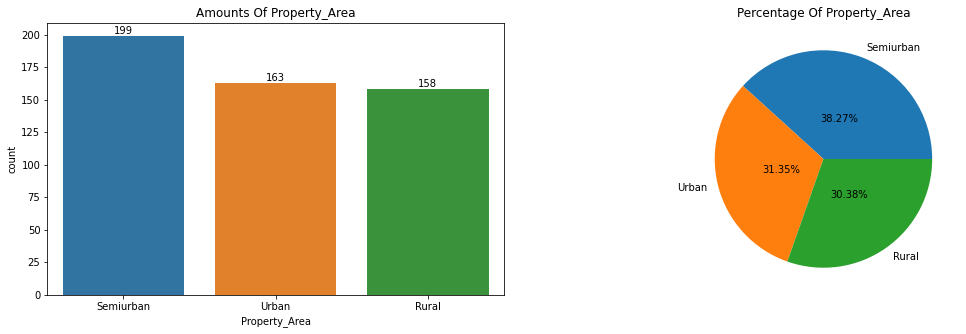

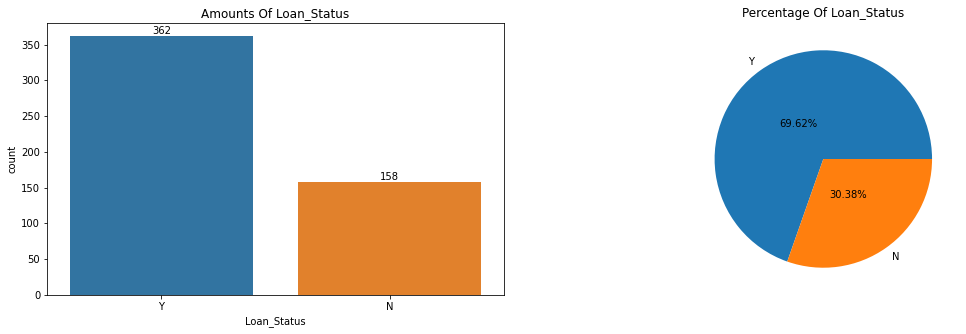

In [57]:
for col in object_cols:

    plt.figure(figsize=(18,5))

    plt.subplot(1,2,1)
    plt.title(f'Amounts Of {col}')
    ax = sns.countplot(x=col,order=df[col].value_counts().index ,data=df)
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    plt.title(f'Percentage Of {col}')
    sizes = df[col].value_counts()
    labels = sizes.index
    plt.pie(sizes,labels=labels,autopct='%1.2f%%',pctdistance=0.4)

    plt.show()

# Regression:

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col))


In [59]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [60]:
# Chia dữ liệu train, test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)

x_train = train.drop(columns=['Loan_Status'])
y_train = train['Loan_Status']

x_test = test.drop(columns=['Loan_Status'])
y_test = test['Loan_Status']

In [61]:
# Train model

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
model.fit(x_train, y_train)



GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [62]:
# Tinh toan acc tren test

acc = model.score(x_test, y_test)
print(acc*100)

75.0


In [63]:
# XgBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 100)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
acc = model_xgb.score(x_test, y_test)
print(acc*100)

71.15384615384616
